**Loading the output file**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV file with a single column
df = pd.read_csv(r"drive/My Drive/full_output.csv", header=None,  encoding='utf8')

# Split the single column into multiple columns using spaces as the delimiter
df = df[0].str.split('\s+', expand=True)

# Determine the number of columns
num_columns = df.shape[1]

# Generate generic column names if not provided
column_names = [f"col_{i}" for i in range(1, num_columns + 1)]

# Assign column names to the DataFrame
df.columns = column_names

# Convert string columns to numeric if needed
df = df.apply(pd.to_numeric, errors='ignore')

# Now df contains the DataFrame with properly separated columns and named columns
df.columns = df.iloc[0]
df = df.iloc[:, 1:-1]
df = df.apply(pd.to_numeric, errors='ignore')
df = df.reset_index(drop=True)
df = df.iloc[1: , :]
df

Mounted at /content/drive


,sim,state,soln,dist_x,time,step,pH,pe,Alk,pct_err,si_QUARTZ,si_CHALCEDONY,si_SIO2(a),si_CALCITE
1,1,i_soln,16,-99,-99,-99,7.16,4,0.00563878,-1.14034,0.4988,0.0200,-1.0443,-0.0494
2,1,i_soln,27,-99,-99,-99,6.92,4,0.00902048,0.0585485,0.4063,-0.0914,-1.1726,0.1248
3,1,i_soln,28,-99,-99,-99,6.99,4,0.00851969,0.0788052,0.4598,-0.0450,-1.1323,0.0662
4,1,i_soln,31,-99,-99,-99,6.7,4,0.00613862,9.10873,0.2829,-0.1464,-1.1641,-0.3580
5,1,i_soln,35,-99,-99,-99,7.11,4,0.00809956,5.48612,0.4190,-0.0589,-1.1225,0.0937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4482,1,i_soln,19139,-99,-99,-99,7.06,4,0.0079591,1.64371,-27.1307,-27.6533,-28.7559,0.0018
4483,1,i_soln,19140,-99,-99,-99,6.9,4,0.00687872,-1.67135,-27.5650,-28.0876,-29.1902,-0.2590
4484,1,i_soln,19141,-99,-99,-99,6.93,4,0.00755884,-2.00209,-27.5650,-28.0876,-29.1902,-0.1751
4485,1,i_soln,19142,-99,-99,-99,7.19,4,0.00697879,0.5146,-27.1307,-27.6533,-28.7559,0.0434


**Checking to see if all the datapoints converged and none crashed**

In [ ]:
n = len(df)
print("The length of the final output dataframe - fully completed simulations is", n)

The length of the final output dataframe - fully completed simulations is 4486


**Loading the input file and rechecking if all converged**

In [ ]:
df_input = pd.read_csv (r'drive/My Drive/NAWQA_GLACM&M_AsMn_SIss.200914_abbreviated for email to Chen Zhu.csv')
soln_values = df['soln'].astype(int).tolist()
missing_numbers = df_input[~df_input['Number'].isin(soln_values)]['Number'].tolist()
missing_df = df_input[~df_input['Number'].isin(soln_values)]['Number'].tolist()
len(missing_df)

0

**Joining the two tables - Input and Output table**

In [ ]:
df['soln'] = df['soln'].astype(int)
df_input.rename(columns={'Number': 'soln'}, inplace=True)
merged_df = pd.merge(df, df_input, on='soln', how='left', indicator=True)

# Dropping the duplicate column
merged_df.drop('soln', axis=1, inplace=True)

# Displaying the merged DataFrame
merged_df

,sim,state,dist_x,time,step,pH_x,pe,Alk,pct_err,si_QUARTZ,...,Site.ID,State,Water.use.code,Well.depth.in.meters,Screen.length.in.meters,Bedrock.lithology,Lithology,Terrane,Terrane.description,_merge
0,1,i_soln,-99,-99,-99,7.16,4,0.00563878,-1.14034,0.4988,...,375756088081201,IL,P,25.00,12.2,carbonate rock,carbonate rock,1B,Lower complexity; Generally Pre-Late Wisconsin...,both
1,1,i_soln,-99,-99,-99,6.92,4,0.00902048,0.0585485,0.4063,...,382629087362101,IN,U,6.71,1.5,non-carbonate sedimentary rock,non-carbonate sedimentary rock,1B,Lower complexity; Generally Pre-Late Wisconsin...,both
2,1,i_soln,-99,-99,-99,6.99,4,0.00851969,0.0788052,0.4598,...,382629087362102,IN,U,12.20,1.5,non-carbonate sedimentary rock,non-carbonate sedimentary rock,1B,Lower complexity; Generally Pre-Late Wisconsin...,both
3,1,i_soln,-99,-99,-99,6.7,4,0.00613862,9.10873,0.2829,...,382833087193201,IN,U,15.85,2.2,non-carbonate sedimentary rock,non-carbonate sedimentary rock,1B,Lower complexity; Generally Pre-Late Wisconsin...,both
4,1,i_soln,-99,-99,-99,7.11,4,0.00809956,5.48612,0.4190,...,383115086590701,IN,U,20.43,2.3,non-carbonate sedimentary rock,non-carbonate sedimentary rock,1B,Lower complexity; Generally Pre-Late Wisconsin...,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4481,1,i_soln,-99,-99,-99,7.06,4,0.0079591,1.64371,-27.1307,...,neOAK-09-100,NE,U,30.49,1.7,non-carbonate sedimentary rock,non-carbonate sedimentary rock,2D,Moderate complexity; Older Sediment in Iowa an...,both
4482,1,i_soln,-99,-99,-99,6.9,4,0.00687872,-1.67135,-27.5650,...,neOAK-09-180,NE,U,54.88,1.5,non-carbonate sedimentary rock,non-carbonate sedimentary rock,2D,Moderate complexity; Older Sediment in Iowa an...,both
4483,1,i_soln,-99,-99,-99,6.93,4,0.00755884,-2.00209,-27.5650,...,neOAK-10-125,NE,U,38.11,2.0,non-carbonate sedimentary rock,non-carbonate sedimentary rock,2D,Moderate complexity; Older Sediment in Iowa an...,both
4484,1,i_soln,-99,-99,-99,7.19,4,0.00697879,0.5146,-27.1307,...,neOAK-11-92,NE,U,28.05,1.9,non-carbonate sedimentary rock,non-carbonate sedimentary rock,2D,Moderate complexity; Older Sediment in Iowa an...,both


**Creating 3 more dataframes based on Lithology**

In [ ]:
carbonate_df = merged_df[merged_df['Lithology'] == 'carbonate rock']

sed_df = merged_df.loc[
    (merged_df['Lithology'] == 'non-carbonate sedimentary rock') |
    (merged_df['Lithology'] == 'Unconsolidated') |
    (pd.isna(merged_df['Lithology']))
]

hot_df = merged_df.loc[
    (merged_df['Lithology'] == 'plutonic rock') |
    (merged_df['Lithology'] == 'non-carbonate metamorphic rock' ) |
    (merged_df['Lithology'] == 'volcanic rock' ) |
    (pd.isna(merged_df['Lithology']))
]

**Function for plotting all 4 plots**

In [ ]:
def plot_four_histograms(parameter,bw1,bw2,bw3,bw4,x_name,step1,titles=['All analysis', 'Category 1', 'Category 2', 'Category 3']):

    data1 = merged_df[parameter]
    data2 = carbonate_df[parameter]
    data3 =  sed_df[parameter]
    data4 =  hot_df[parameter]

    data1 = data1.apply(pd.to_numeric)
    data2 = data2.apply(pd.to_numeric)
    data3 = data3.apply(pd.to_numeric)
    data4 = data4.apply(pd.to_numeric)

    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    n = len(data1)
    axs[0, 0].hist(data1, bins=np.arange(min(data1), max(data1) + bw1, bw1),edgecolor='black',color='skyblue')
    axs[0, 0].set_title(titles[0])
    #axs[0, 0].set_xticks(np.arange(0, 55, step=5))
    axs[0, 0].set_xticks(np.arange(min(0, min(data1)), max(0, max(data1)), step=step1))
    axs[0, 0].set_xlabel(x_name + f"\n n={n}")
    axs[0, 0].set_ylabel('Frequency')

    n = len(data2)
    axs[0, 1].hist(data2, bins=np.arange(min(data2), max(data2) + bw2, bw2), edgecolor='black',color='skyblue')
    axs[0, 1].set_title(titles[1])
    axs[0, 1].set_xticks(np.arange(min(0, min(data1)), max(0, max(data1)), step=step1))
    axs[0, 1].set_xlabel(x_name + f"\n n={n}")
    axs[0, 1].set_ylabel('Frequency')

    n = len(data3)
    axs[1, 0].hist(data3, bins=np.arange(min(data3), max(data3) + bw3, bw3), edgecolor='black',color='skyblue')
    axs[1, 0].set_title(titles[2])
    axs[1, 0].set_xticks(np.arange(min(0, min(data1)), max(0, max(data1)), step=step1))
    axs[1, 0].set_xlabel(x_name + f"\n n={n}")
    axs[1, 0].set_ylabel('Frequency')

    n = len(data4)
    axs[1, 1].hist(data4, bins=np.arange(min(data4), max(data4) + bw4, bw4),edgecolor='black',color='skyblue')
    axs[1, 1].set_title(titles[3])
    axs[1, 1].set_xticks(np.arange(min(0, min(data1)), max(0, max(data1)), step=step1))
    axs[1, 1].set_xlabel(x_name + f"\n n={n}")
    axs[1, 1].set_ylabel('Frequency')

    plt.tight_layout()  # Adjust subplots to fit into figure area.
    plt.show()

**Function calls for plotting the parameters individually**

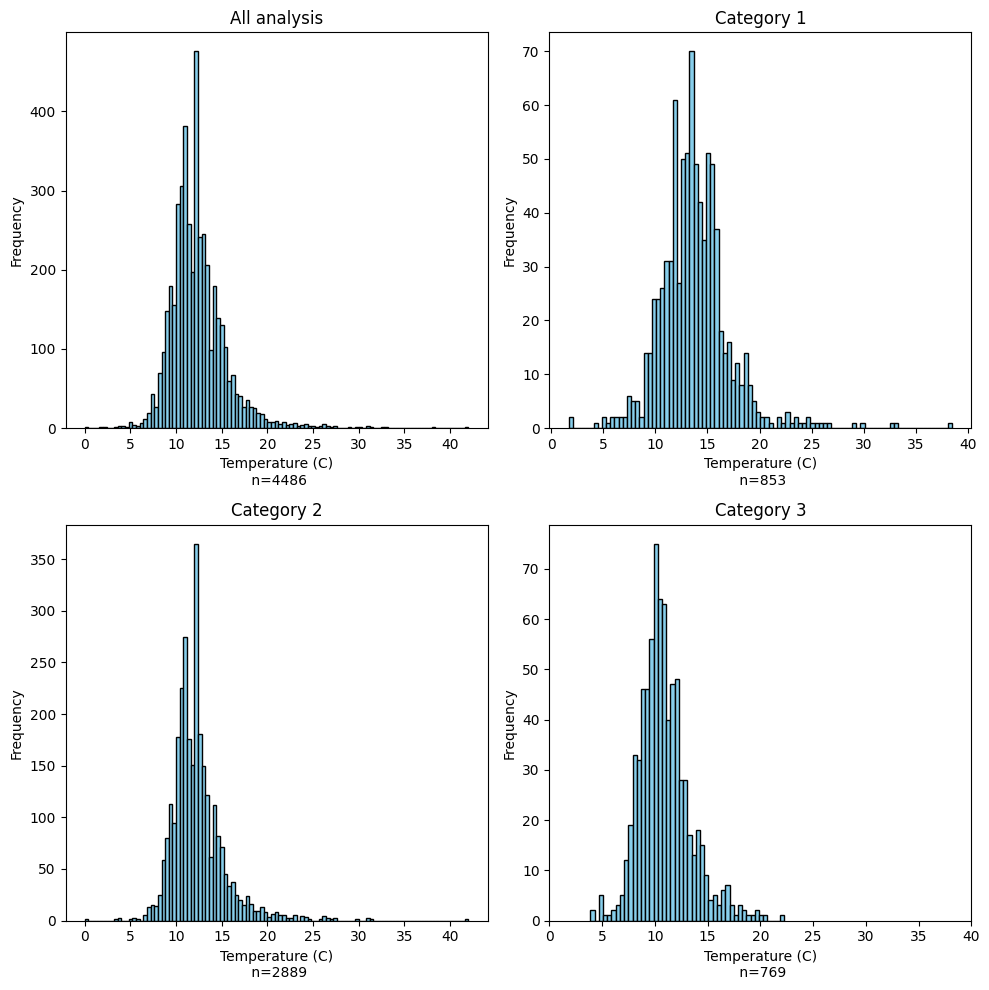

In [ ]:
x_name = 'Temperature (C)'
parameter = 'Temp'
bw1 = 0.4
bw2 = 0.4
bw3 = 0.4
bw4 = 0.4
step1 = 5
plot_four_histograms(parameter,bw1,bw2,bw3,bw4,x_name,step1)

In [ ]:
def plot_four_histograms1(parameter,bw1,bw2,bw3,bw4,x_name,step1,x_ticks1,titles=['All analysis', 'Category 1', 'Category 2', 'Category 3']):

    required_paramters = ('si_QUARTZ', 'si_CHALCEDONY', 'si_SIO2(a)')

    data1 = merged_df[parameter]
    data1 = data1.apply(pd.to_numeric)
    if parameter in required_paramters:
      data1 = data1[data1 >= -26]

    data2 = carbonate_df[parameter]
    data2 = data2.apply(pd.to_numeric)
    if parameter in required_paramters:
      data2 = data2[data2 >= -26]

    data3 =  sed_df[parameter]
    data3 = data3.apply(pd.to_numeric)
    if parameter in required_paramters:
      data3 = data3[data3 >= -26]

    data4 =  hot_df[parameter]
    data4 = data4.apply(pd.to_numeric)
    if parameter in required_paramters:
      data4 = data4[data4 >= -26]


    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    n = len(data1)
    axs[0, 0].hist(data1, bins=np.arange(min(data1), max(data1) + bw1, bw1),edgecolor='black',color='skyblue')
    axs[0, 0].set_title(titles[0])
    #axs[0, 0].set_xticks(np.arange(0, 55, step=5))
    axs[0, 0].set_xticks(x_ticks1)
    axs[0, 0].set_xlabel(x_name + f"\n n={n}")
    axs[0, 0].set_ylabel('Frequency')

    n = len(data2)
    axs[0, 1].hist(data2, bins=np.arange(min(data2), max(data2) + bw2, bw2), edgecolor='black',color='skyblue')
    axs[0, 1].set_title(titles[1])
    axs[0, 1].set_xticks(x_ticks1)
    axs[0, 1].set_xlabel(x_name + f"\n n={n}")
    axs[0, 1].set_ylabel('Frequency')

    n = len(data3)
    axs[1, 0].hist(data3, bins=np.arange(min(data3), max(data3) + bw3, bw3), edgecolor='black',color='skyblue')
    axs[1, 0].set_title(titles[2])
    axs[1, 0].set_xticks(x_ticks1)
    axs[1, 0].set_xlabel(x_name + f"\n n={n}")
    axs[1, 0].set_ylabel('Frequency')

    n = len(data4)
    axs[1, 1].hist(data4, bins=np.arange(min(data4), max(data4) + bw4, bw4),edgecolor='black',color='skyblue')
    axs[1, 1].set_title(titles[3])
    axs[1, 1].set_xticks(x_ticks1)
    axs[1, 1].set_xlabel(x_name + f"\n n={n}")
    axs[1, 1].set_ylabel('Frequency')

    plt.tight_layout()  # Adjust subplots to fit into figure area.
    plt.show()

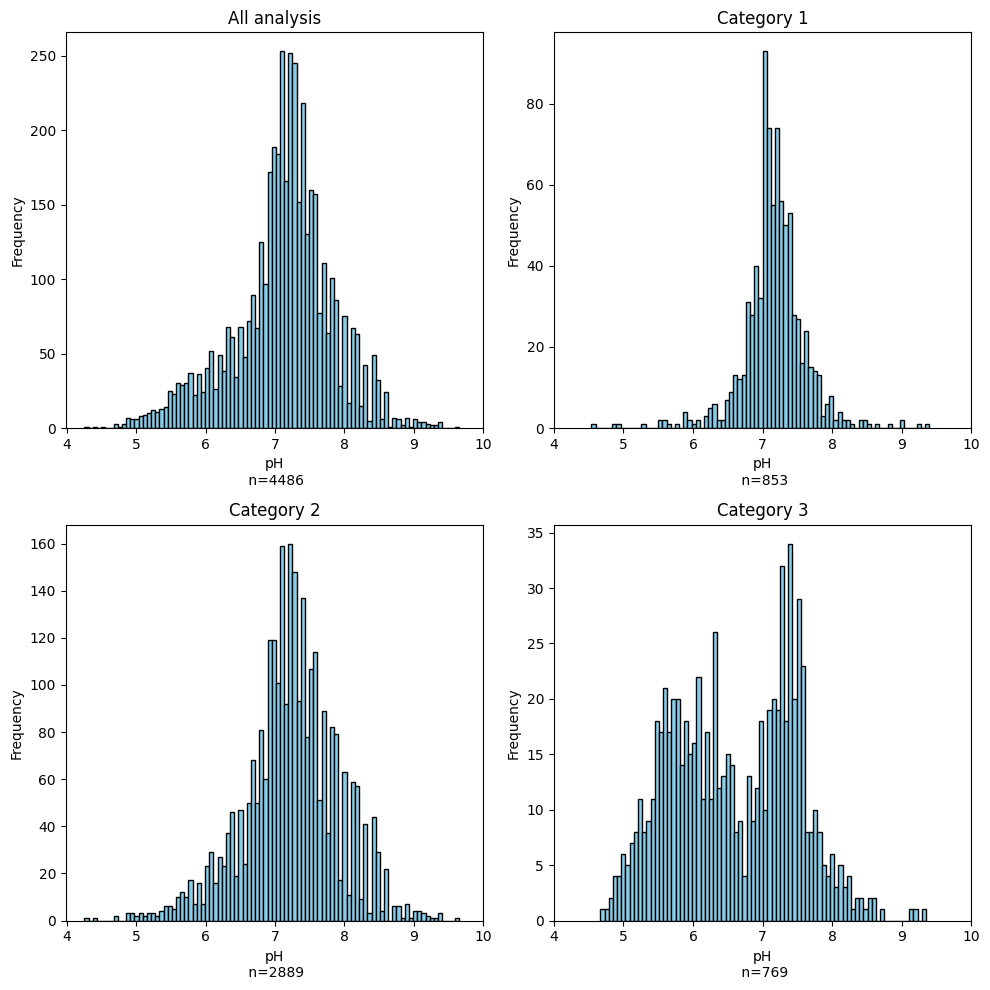

In [ ]:
x_name = 'pH'
parameter = 'pH_y'
bw1 = 0.06
bw2 = 0.06
bw3 = 0.06
bw4 = 0.06
step = 1
x_ticks1 = np.arange(4,11,step=1)
plot_four_histograms1(parameter,bw1,bw2,bw3,bw4,x_name,step,x_ticks1)

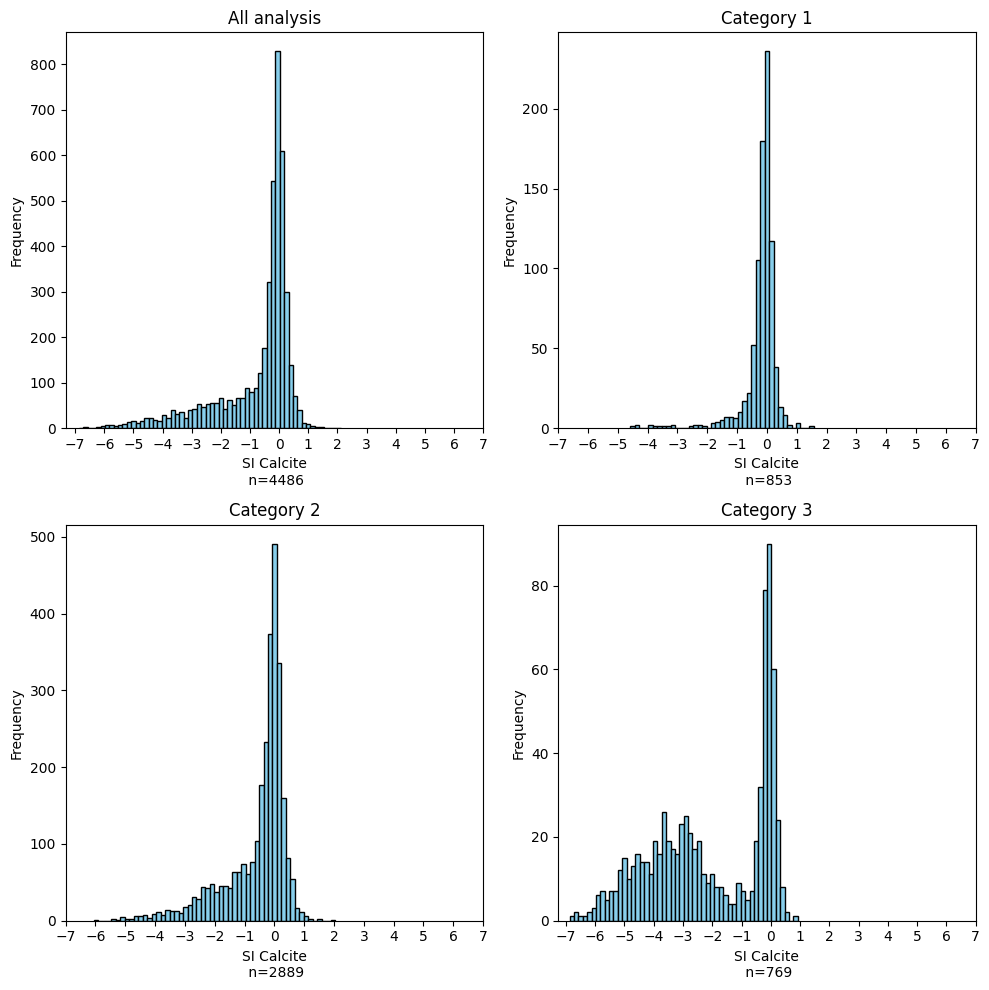

In [ ]:
x_name = 'SI Calcite'
parameter = 'si_CALCITE'
bw1 = 0.15
bw2 = 0.15
bw3 = 0.15
bw4 = 0.15
step = 1
x_ticks1 = np.arange(-7,8,step=1)
plot_four_histograms1(parameter,bw1,bw2,bw3,bw4,x_name,step,x_ticks1)

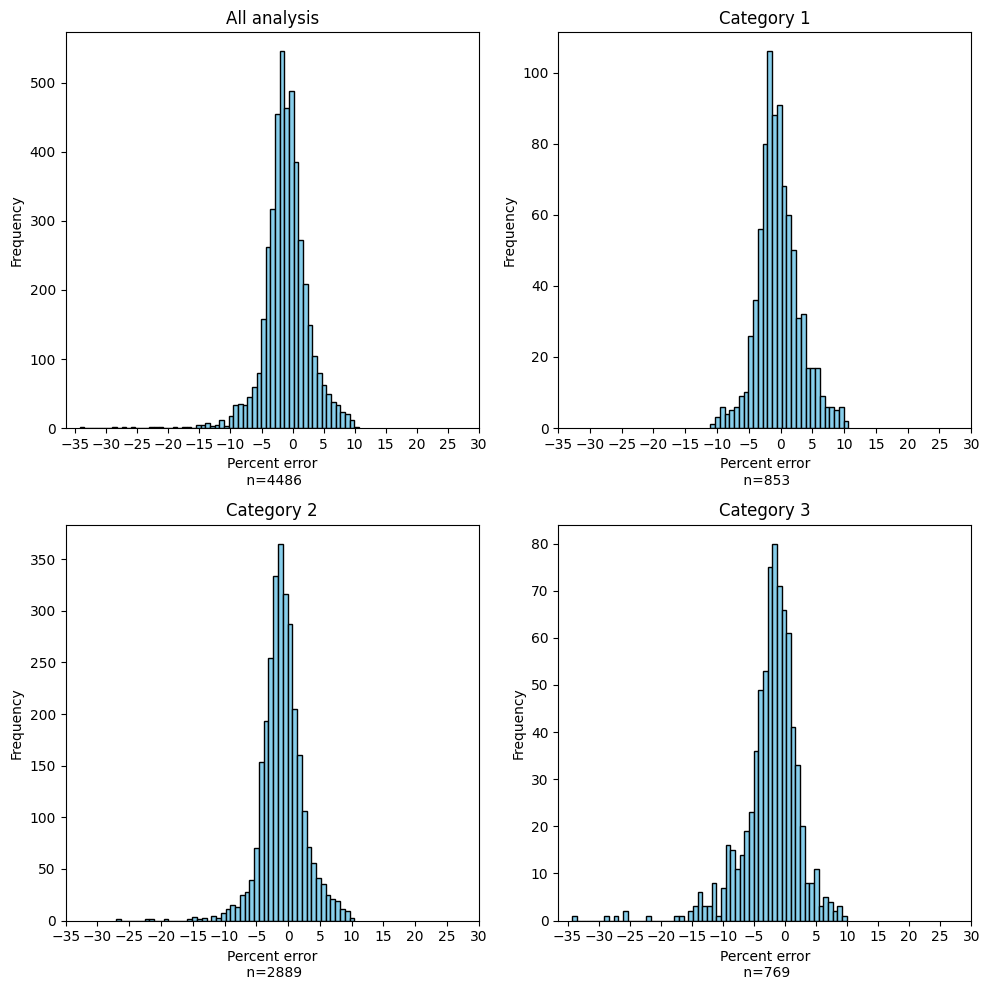

In [ ]:
x_name = 'Percent error'
parameter = 'pct_err'
bw1 = 0.75
bw2 = 0.75
bw3 = 0.75
bw4 = 0.75
step = 1
x_ticks1 = np.arange(-35,35,step=5)
plot_four_histograms1(parameter,bw1,bw2,bw3,bw4,x_name,step,x_ticks1)

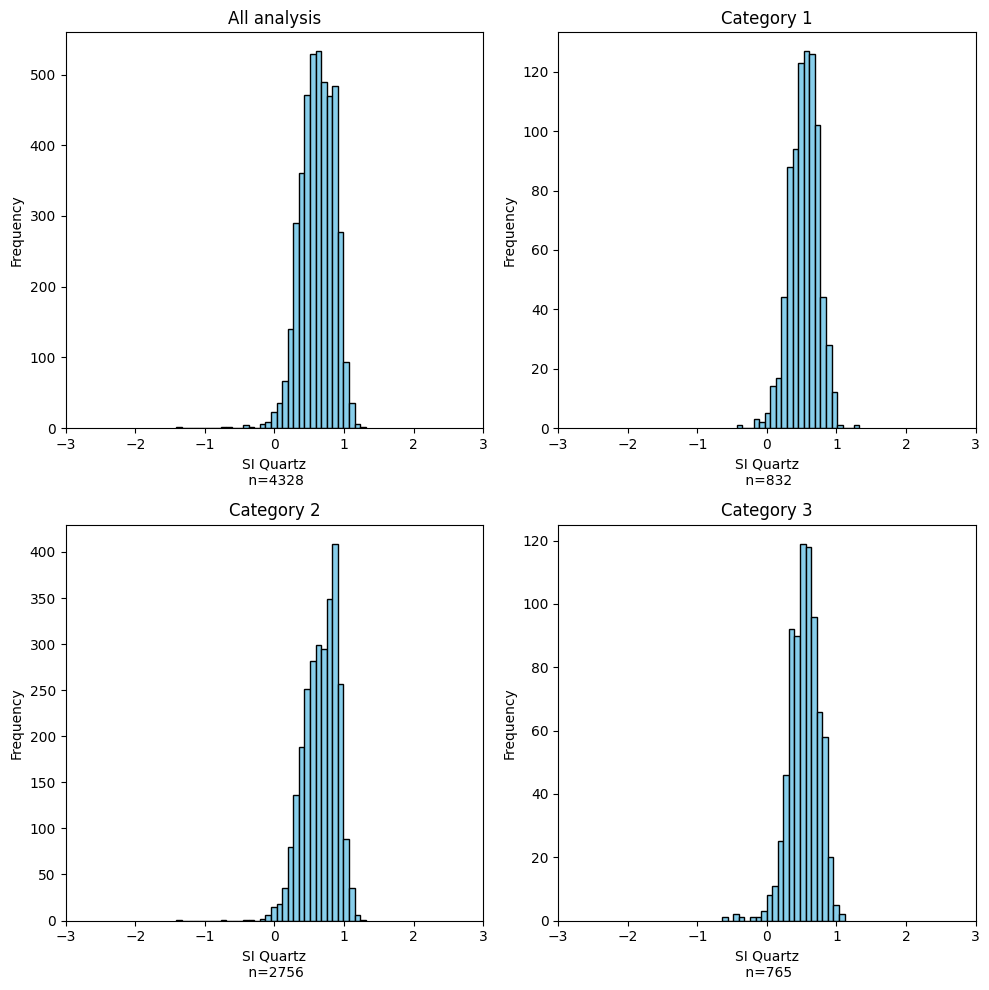

In [ ]:
x_name = 'SI Quartz'
parameter = 'si_QUARTZ'
bw1 = 0.08
bw2 = 0.08
bw3 = 0.08
bw4 = 0.08
step = 1
x_ticks1 = np.arange(-3,3.5,step=1)
plot_four_histograms1(parameter,bw1,bw2,bw3,bw4,x_name,step,x_ticks1)

In [ ]:
x_name = 'SI Quartz'
parameter = 'si_QUARTZ'
bw1 = 0.08
bw2 = 0.08
bw3 = 0.08
bw4 = 0.08
step = 1
x_ticks1 = np.arange(-3,3.5,step=1)
plot_four_histograms1(parameter,bw1,bw2,bw3,bw4,x_name,step,x_ticks1)

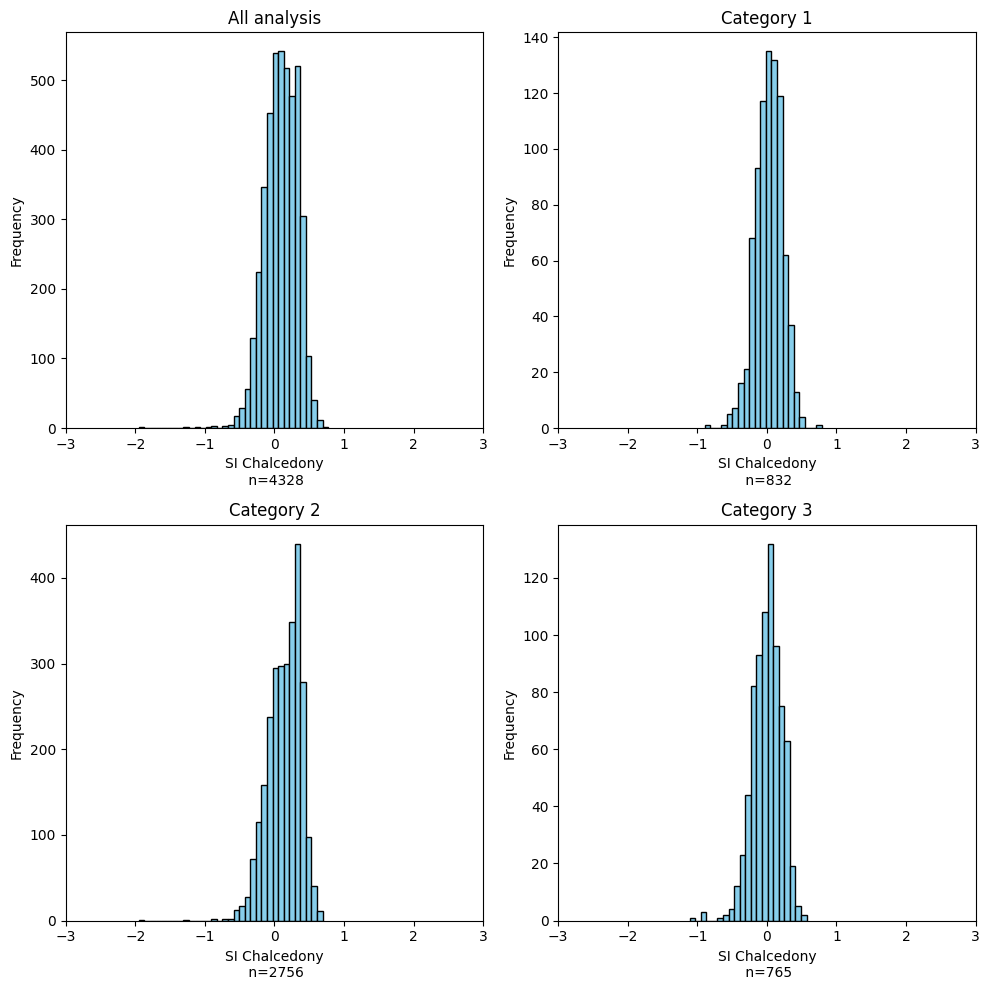

In [ ]:
x_name = 'SI Chalcedony'
parameter = 'si_CHALCEDONY'
bw1 = 0.08
bw2 = 0.08
bw3 = 0.08
bw4 = 0.08
step = 1
x_ticks1 = np.arange(-3,3.5,step=1)
plot_four_histograms1(parameter,bw1,bw2,bw3,bw4,x_name,step,x_ticks1)

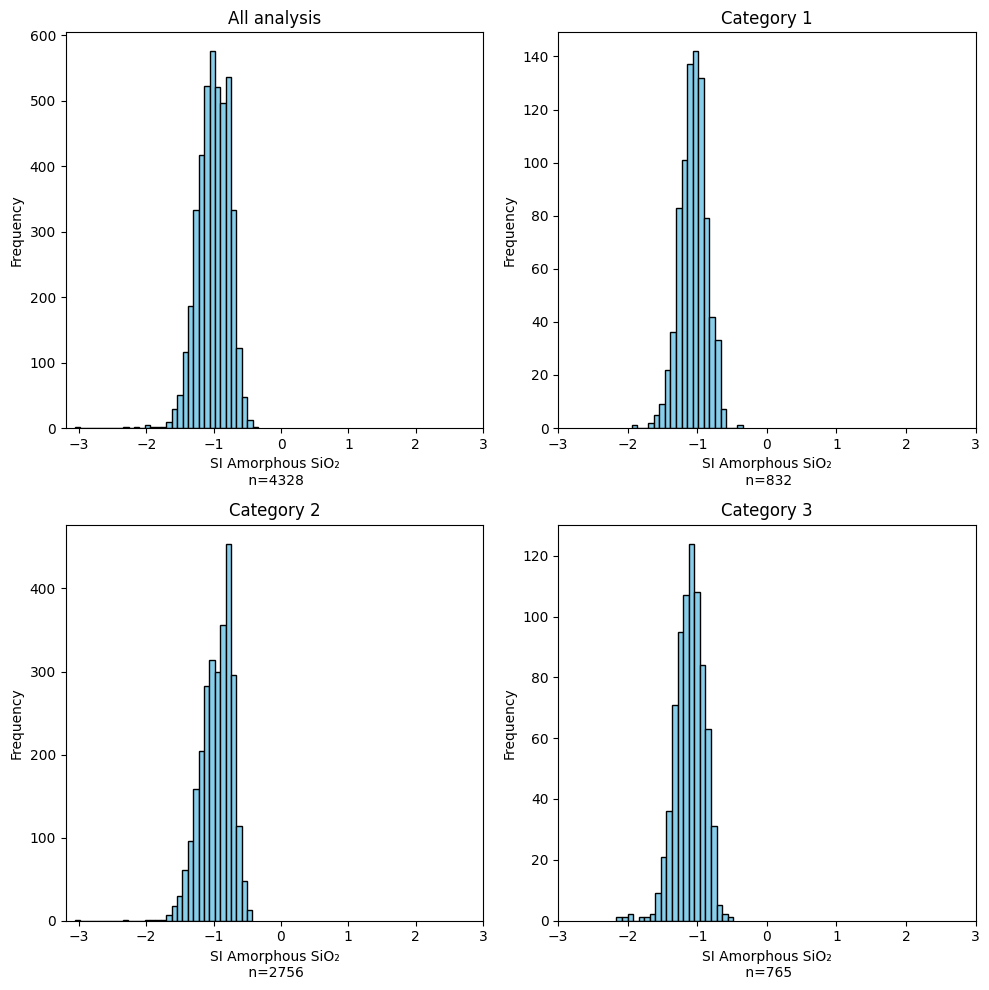

In [ ]:
x_name = 'SI Amorphous SiO\u2082'
parameter = 'si_SIO2(a)'
bw1 = 0.08
bw2 = 0.08
bw3 = 0.08
bw4 = 0.08
step = 1
x_ticks1 = np.arange(-3,3.5,step=1)
plot_four_histograms1(parameter,bw1,bw2,bw3,bw4,x_name,step,x_ticks1)